In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
import contextily as cx
import os
import seaborn as sns
import shapely as shp

# Changement des entrepôts

In [2]:
# Distance totale

for csv_file in os.listdir("../data_clean"):
    if csv_file[-3:] == "csv":
        globals()[csv_file[:-4]] = pd.read_csv("../data_clean/" + csv_file)

In [3]:
affecations = orders[["from_warehouse", "delivery_location"]].groupby("delivery_location").agg(lambda x:list(x)[0]).reset_index()

In [4]:
affecations_with_coords = pd.merge(affecations, cities[["city", "lat", "lng"]], left_on="delivery_location", right_on="city")

In [5]:
list_cities = ["Angers", "Brest", "Caen", "Cherbourg", "Le Havre", "Le Mans", "Lorient", "Quimper", "Rennes", "Saint-Nazaire"]

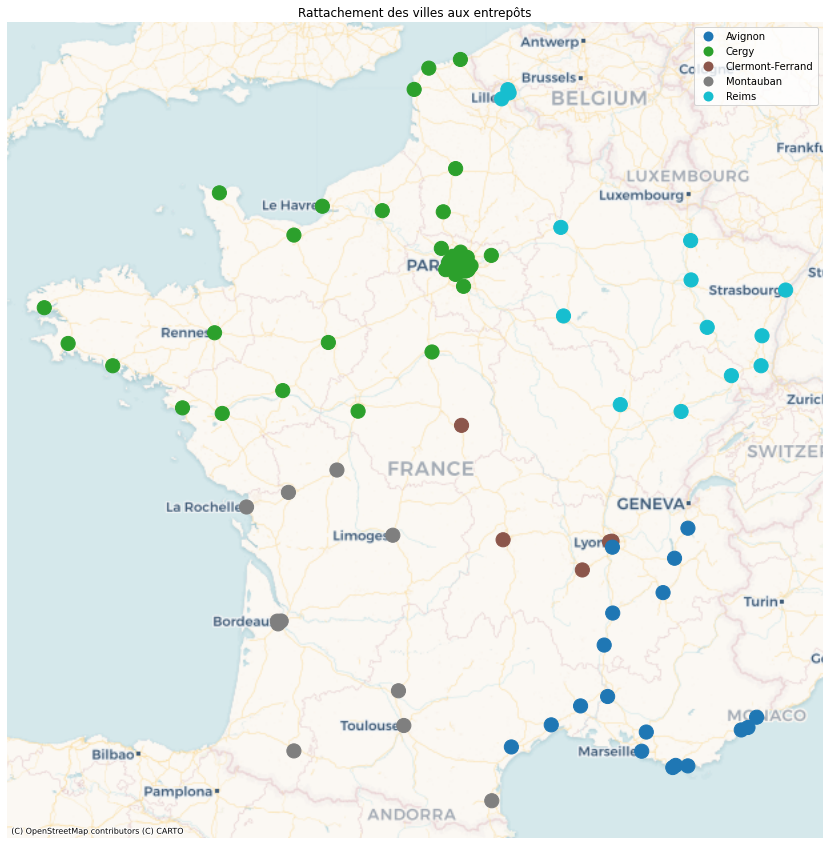

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf = gpd.GeoDataFrame(affecations_with_coords, geometry=gpd.points_from_xy(affecations_with_coords.lng, affecations_with_coords.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="from_warehouse", legend=True, markersize=200)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Rattachement des villes aux entrepôts")
plt.show()

L'idée est de supprimer l'entrepôt de Clermont et créer un entrepôt à Rennes.

In [7]:
affecations2 = affecations.copy()

In [8]:
affecations2[affecations2["from_warehouse"]=="Clermont-Ferrand"]

,delivery_location,from_warehouse
16,Bourges,Clermont-Ferrand
27,Clermont-Ferrand,Clermont-Ferrand
50,Lyon,Clermont-Ferrand
85,Saint-Étienne,Clermont-Ferrand
95,Villeurbanne,Clermont-Ferrand


In [9]:
affecations2.loc[affecations2["delivery_location"].isin(["Lyon", "Villeurbanne", "Saint-Étienne", "Clermont-Ferrand"]), "from_warehouse"] = "Avignon"

In [10]:
affecations2[affecations2["delivery_location"].isin(["Lyon", "Villeurbanne", "Saint-Étienne"])]

,delivery_location,from_warehouse
50,Lyon,Avignon
85,Saint-Étienne,Avignon
95,Villeurbanne,Avignon


In [11]:
affecations2.loc[affecations2["delivery_location"].isin(["Bourges"]), "from_warehouse"] = "Cergy"

In [12]:
list_cities = ["Angers", "Brest", "Caen", "Cherbourg", "Le Havre", "Le Mans", "Lorient", "Nantes", "Quimper", "Rennes", "Saint-Nazaire"]

In [13]:
affecations2.loc[affecations2["delivery_location"].isin(list_cities), "from_warehouse"] = "Rennes"

In [14]:
affecations2[affecations2["from_warehouse"]=="Cergy"]

,delivery_location,from_warehouse
1,Amiens,Cergy
5,Antony,Cergy
6,Argenteuil,Cergy
7,Aubervilliers,Cergy
8,Aulnay-sous-Bois,Cergy
10,Beauvais,Cergy
14,Boulogne-Billancourt,Cergy
15,Boulogne-sur-Mer,Cergy
16,Bourges,Cergy
20,Calais,Cergy


In [15]:
list_cities_to_cergy=["Roubaix", "Tourcoing", "Lille"]

In [16]:
affecations2.loc[affecations2["delivery_location"].isin(list_cities_to_cergy), "from_warehouse"] = "Cergy"

In [17]:
affecations2_with_coords = pd.merge(affecations2, cities[["city", "lat", "lng"]], left_on="delivery_location", right_on="city")

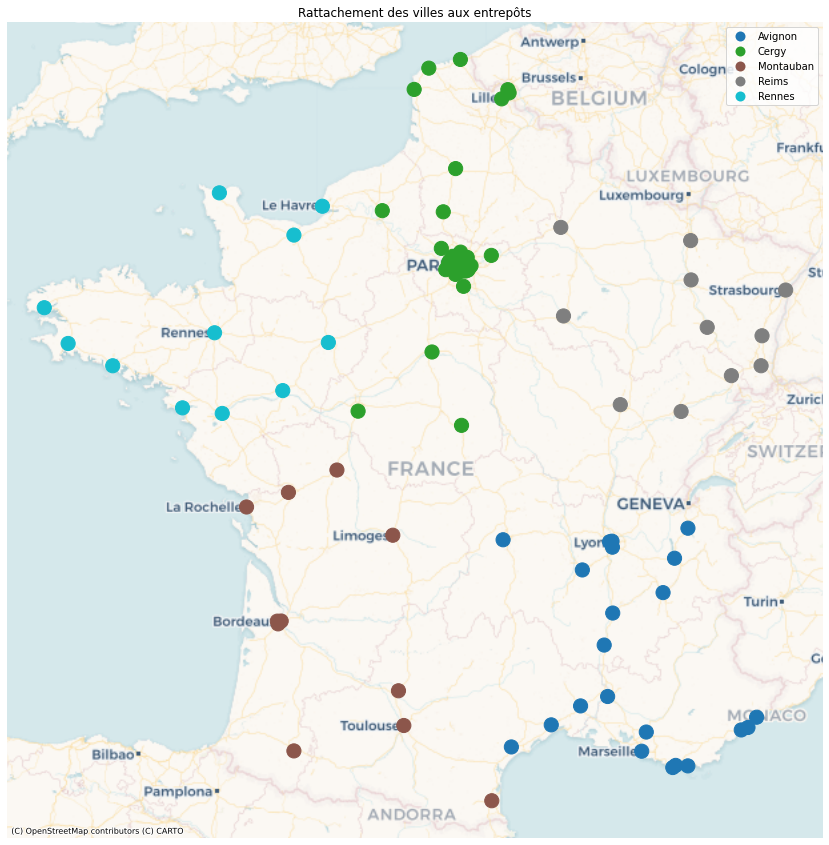

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf = gpd.GeoDataFrame(affecations2_with_coords, geometry=gpd.points_from_xy(affecations2_with_coords.lng, affecations2_with_coords.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="from_warehouse", legend=True, markersize=200)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Rattachement des villes aux entrepôts")
plt.show()

In [19]:
affecations2 = affecations2.set_index("delivery_location")

In [20]:
orders["from_warehouse"] = orders["delivery_location"].apply(lambda loc:affecations2.loc[loc])

In [21]:
orders.to_csv("orders_s2.csv")

# Résultats `delay=1`

In [22]:
new_routes = pd.read_csv("new_routes_s2.csv")
routes = pd.read_csv("../data_clean/new_routes.csv")

routes["fill_rate"] = routes["fill_volume"] / 81.25
new_routes["fill_rate"] = new_routes["fill_volume"] / 81.25

Text(0.5, 1.0, 'Distribution des taux de remplissage des camions')

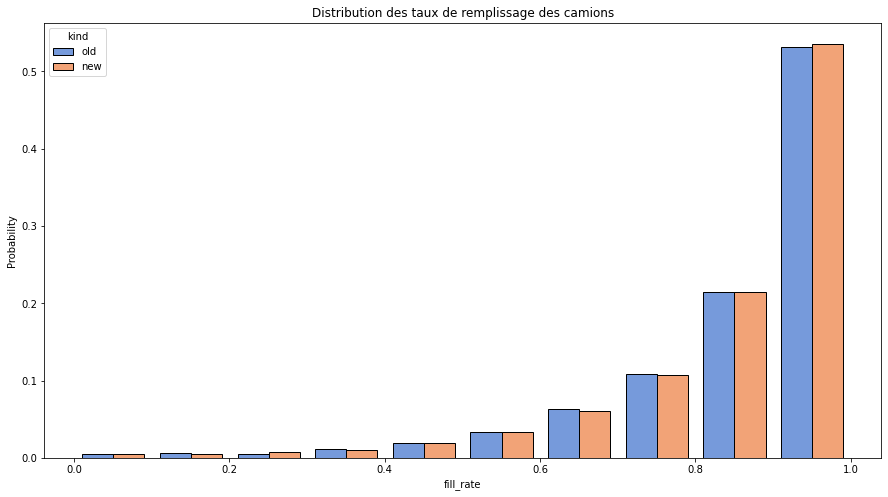

In [23]:
df_rates = pd.DataFrame(dict(fill_rate=routes.fill_rate, from_warehouse=routes.from_warehouse, kind=["old"]*len(routes))).append(
    pd.DataFrame(dict(fill_rate=new_routes.fill_rate, from_warehouse=new_routes.from_warehouse, kind=["new"]*len(new_routes)))).reset_index()
plt.figure(figsize=(15,8))
sns.histplot(x="fill_rate", hue="kind", data=df_rates, stat="probability", multiple="dodge", common_norm=False, bins=10, palette=sns.color_palette("muted")[:2], shrink=0.80)
plt.title("Distribution des taux de remplissage des camions")

In [24]:
new_routes["route_date"] = pd.to_datetime(new_routes["route_date"])

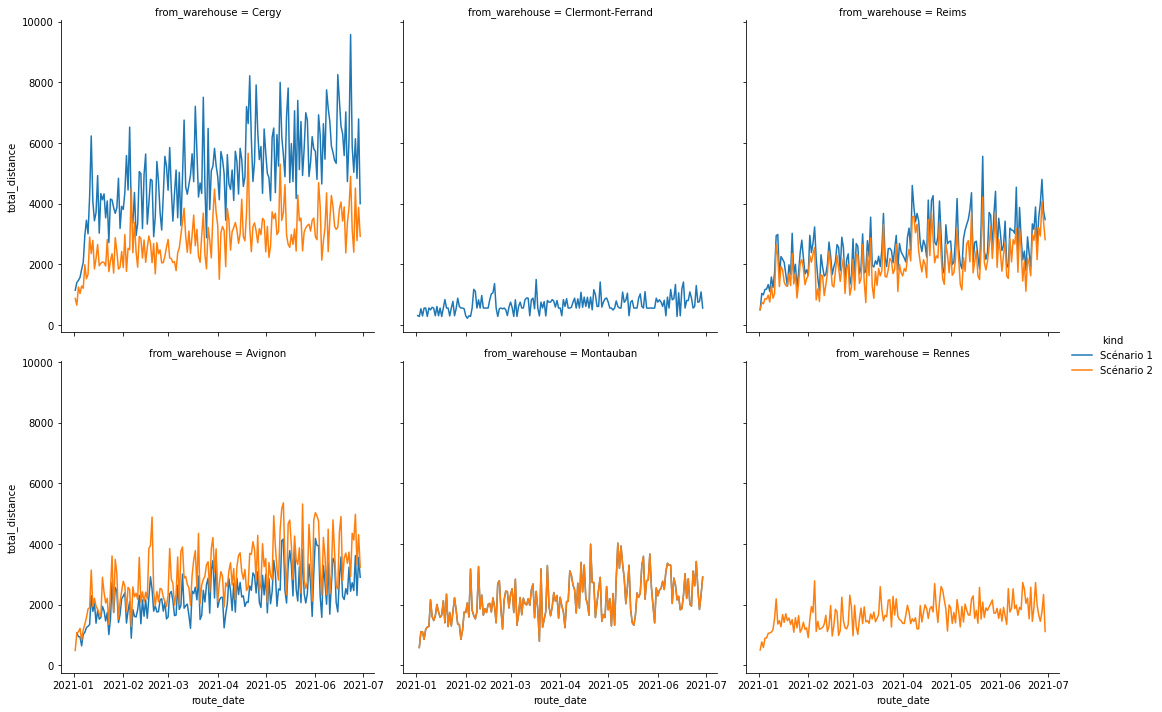

In [25]:
df1 = routes[["route_date", "total_distance", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index()
df1["kind"] = "Scénario 1"
df2 = new_routes[["route_date", "total_distance", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index()
df2["kind"] = "Scénario 2"

distances = df1.append(df2)

distances["route_date"] = pd.to_datetime(distances["route_date"])

g = sns.FacetGrid(distances, col="from_warehouse", hue="kind", col_wrap=3, height=5)
g.map(sns.lineplot, "route_date", "total_distance")
g.add_legend()

In [26]:
df = new_routes.copy()
df["n_routes"] = 1
df["route_date"] = pd.to_datetime(df["route_date"])
df = df[["n_routes", "route_date", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg(sum).reset_index()

Text(0.5, 1.0, 'Nombre de trajets par jour par entrepôt')

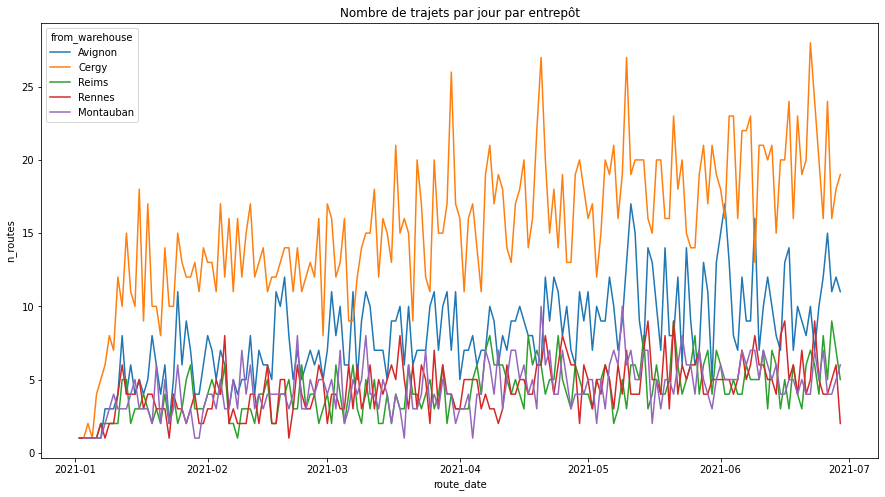

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot(x="route_date", y="n_routes", hue="from_warehouse", data=df)
plt.title("Nombre de trajets par jour par entrepôt")

In [28]:
routes.total_distance.sum()

2266636.145

In [29]:
new_routes.total_distance.sum()

2087490.8170000003

In [30]:
routes.total_distance.sum() - new_routes.total_distance.sum()

179145.32799999975

In [31]:
(routes.total_distance.sum() - new_routes.total_distance.sum()) / routes.total_distance.sum() * 100

7.903576778089354

# Résultats `delay=2`

## Comparaison des taux de remplissage

In [32]:
new_routes2 = pd.read_csv("new_routes_s2_2.csv")

In [33]:
new_routes2["fill_rate"] = new_routes2["fill_volume"] / 81.25

Text(0.5, 1.0, 'Distribution des taux de remplissage des camions')

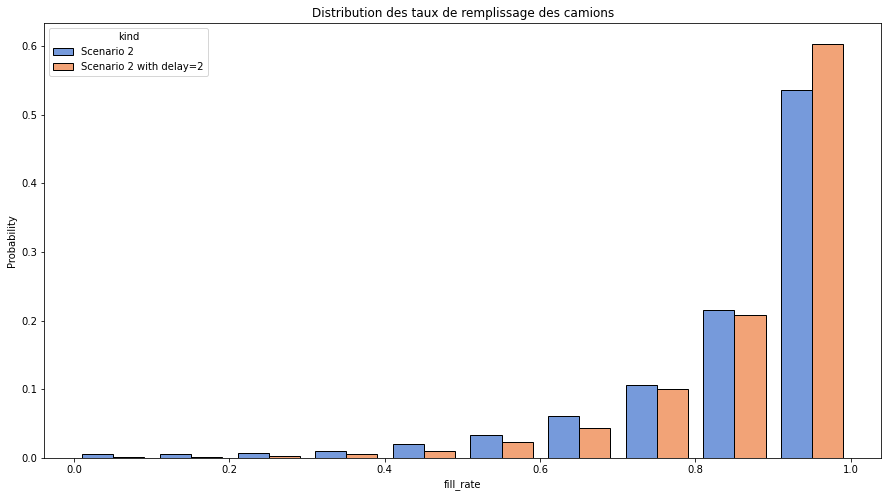

In [34]:
df_rates = pd.DataFrame(dict(fill_rate=new_routes.fill_rate, from_warehouse=new_routes.from_warehouse, kind=["Scenario 2"]*len(new_routes))).append(
    pd.DataFrame(dict(fill_rate=new_routes2.fill_rate, from_warehouse=new_routes2.from_warehouse, kind=["Scenario 2 with delay=2"]*len(new_routes2)))).reset_index()
plt.figure(figsize=(15,8))
sns.histplot(x="fill_rate", hue="kind", data=df_rates, stat="probability", multiple="dodge", common_norm=False, bins=10, palette=sns.color_palette("muted")[:2], shrink=0.80)
plt.title("Distribution des taux de remplissage des camions")

## Comparaison des distances

In [35]:
(new_routes.total_distance.sum() - new_routes2.total_distance.sum()) / new_routes.total_distance.sum() * 100

13.754892173017891

In [36]:
first_routes = pd.read_csv("../data_clean/routes.csv")

In [37]:
first_routes.total_distance.sum()

3063971.6525546503

In [38]:
routes.total_distance.sum()

2266636.145

In [39]:
new_routes.total_distance.sum()

2087490.8170000003

In [40]:
new_routes2.total_distance.sum()

1800358.706

## Comparaison des temps de livraison

In [41]:
sub_df = new_routes2[['orders', 'route_date']]
sub_df['orders'] = sub_df['orders'].str.split(" > ")
sub_df = sub_df.explode("orders")
sub_df = pd.merge(sub_df, orders[['order_id', 'order_date']], left_on="orders", right_on="order_id")
sub_df['order_date'] = pd.to_datetime(sub_df['order_date'] )
sub_df['route_date'] = pd.to_datetime(sub_df['route_date'] )
delay2 = (sub_df['route_date'] - sub_df['order_date']).dt.days

/var/folders/lr/pr9gn1c11knd9lzmwj4tmst00000gn/T/ipykernel_64083/3385319462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['orders'] = sub_df['orders'].str.split(" > ")


In [42]:
sub_df = new_routes[['orders', 'route_date']]
sub_df['orders'] = sub_df['orders'].str.split(" > ")
sub_df = sub_df.explode("orders")
sub_df = pd.merge(sub_df, orders[['order_id', 'order_date']], left_on="orders", right_on="order_id")
sub_df['order_date'] = pd.to_datetime(sub_df['order_date'] )
sub_df['route_date'] = pd.to_datetime(sub_df['route_date'] )
delay = (sub_df['route_date'] - sub_df['order_date']).dt.days

/var/folders/lr/pr9gn1c11knd9lzmwj4tmst00000gn/T/ipykernel_64083/2460285116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['orders'] = sub_df['orders'].str.split(" > ")


<AxesSubplot:xlabel='delay', ylabel='Probability'>

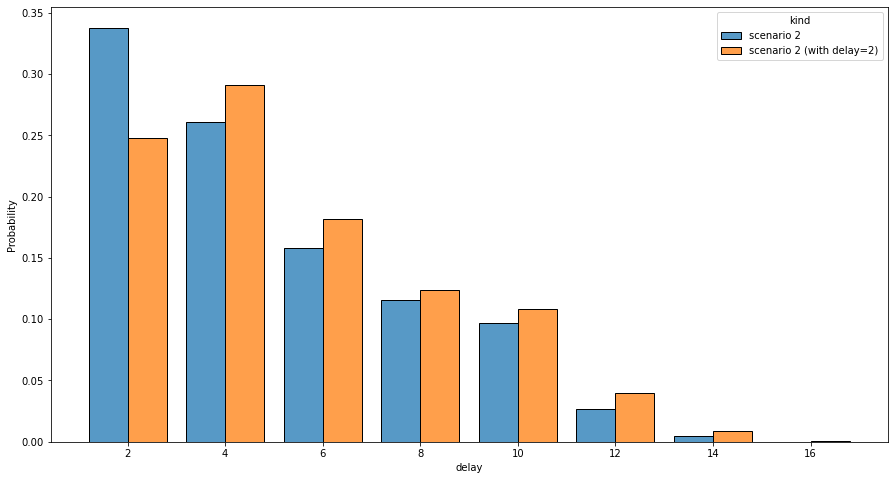

In [43]:
df = pd.DataFrame(dict(delay=delay, kind=["scenario 2"]*len(delay)))
df2 = pd.DataFrame(dict(delay=delay2, kind=["scenario 2 (with delay=2)"]*len(delay2)))
df = df.append(df2, ignore_index=True)
plt.figure(figsize=(15,8))
sns.histplot(x="delay", hue="kind", data=df, stat="probability", multiple="dodge", common_norm=False, binwidth=2, shrink=.80)

In [44]:
delay.mean()

4.4222412886441

In [45]:
delay2.mean()

4.921978356535939